### This is the version of 4 regression models on imputed_full_data dataset with 'DRG PROGRAM' grouped.

In [2]:
# IMPORT MODULES

import os
from operator import itemgetter    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
get_ipython().magic(u'matplotlib inline')
plt.style.use('ggplot')

from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import RobustScaler, StandardScaler, LabelEncoder, MinMaxScaler, OneHotEncoder, LabelBinarizer
from sklearn.metrics import mean_squared_error, accuracy_score, mean_absolute_error
#from sklearn.cross_validation import KFold, cross_val_score
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, KFold, cross_val_predict, StratifiedKFold, train_test_split, learning_curve, ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn import model_selection, preprocessing
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV,KFold, cross_val_predict, StratifiedKFold, train_test_split, learning_curve, ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, average_precision_score, auc
# from sklearn.utils.fixes import signature
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from mlxtend.plotting import plot_learning_curves
from mlxtend.preprocessing import shuffle_arrays_unison
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
# import tensorflow as tf
# from keras import models, regularizers, layers, optimizers, losses, metrics
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.utils import np_utils
# from keras.utils import to_categorical

print(os.getcwd())
print("Modules imported \n")
import os
# print(os.listdir("../input/"))

/Users/aurorazheng/Documents/datafest
Modules imported 



In [4]:
data = pd.read_excel('../datafest/imputed_full_data.xlsx')
print("With id", data.shape)
data_full = data
print("No id",data_full.shape)

With id (1000, 21)
No id (1000, 21)


In [5]:
df_los = data_full.dropna(subset=['LOS'])
df_los

,Request Status,Transfer Referral Source,County,Transfer Back Agreement,LOA (Mark X if Yes),Accepting Physician Specialty,Required Level Of Care,RequestedTreatmentIntervention,FromWherePatientAdmittedtoReferringFacility,InfectionPrecaution,...,EMTALA Y/N(Patient Status Details),SpecialConsiderations,Gender,DRG Program,PAYOR,LOS Outlier,Discharge Disposition,Age,LOS,ICU LOS
0,Declined,Gardena Memorial,Citrus Valley,False,False,"Surgery, Colorectal",Med/Surg,Surgical Evaluation/Surgery,ER,Covid Positive,...,Yes,Private Room,Male,Head & Neck Procedures,Medicaid Managed Care,Outlier,Intermediate Care,0,0.000000,0.000000
1,Accepted,Mercy Bakersfield,Arcadia,True,False,"Surgery, Colorectal",Telemetry,Orthopaedic Surgery,ER,Covid Positive,...,Yes,Fall Precautions,Female,Craniotomy,Medicaid Managed Care,Outlier,Hospice,78,6.200000,3.200000
2,Declined,Kaweah Delta,Citrus Valley,False,False,Rheumatology,Med/Surg,Medical Management/Optimization,Home,Covid Positive,...,Yes,Bloodless,Male,Hepatobiliary Surgery,Medicaid Managed Care,Outlier,Home Health Org,0,0.000000,0.000000
3,Declined,Valley Presbyterian,Apple Valley,False,False,"Surgery, General- Bariatric",Stepdown,Medical Management/Optimization,Clinic,Covid Positive,...,Yes,Fall Precautions,Male,Fracture/Injury,Medicare,Outlier,Home Health Org,0,0.000000,0.000000
4,Declined,Inter-Community,Citrus Valley,False,False,Neurology- Hospitalist,ICU,Surgical Evaluation/Surgery,Home,Immuno Compromised,...,Yes,Bloodless,Female,Infectious Disease,Medicaid Managed Care,Outlier,Hospice,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Accepted,County Lac Usc,Citrus Valley,True,False,"Surgery, Orthope",Med/Surg,Surgical Evaluation/Surgery,Home,Immuno Compromised,...,Yes,Fall Precautions,Female,Fracture/Injury,Medicare,Outlier,Home Health Org,46,5.000000,0.000000
996,Declined,Beverly Hospital,Citrus Valley,True,False,Cardiology,Telemetry,Surgical Evaluation/Surgery,ER,Other - Specified In Hloc,...,Yes,Private Room,Male,Other General Medicine,Medicare Managed Care,Outlier,Hospice,0,0.000000,0.000000
997,Accepted,Garfield,Citrus Valley,False,False,"Surgery, Neurolo- Spine",Stepdown,Surgical Evaluation/Surgery,ER,Immuno Compromised,...,Yes,Bloodless,Female,Fracture/Injury,Medicaid,Outlier,Long Term Care,49,6.999999,0.000008
998,Accepted,Garfield,Citrus Valley,False,False,"Surgery, General- Hepato",Stepdown,Surgical Evaluation/Surgery,Clinic,Immuno Compromised,...,Yes,Fall Precautions,Female,Hepatobiliary Surgery,Medicare,Outlier,SNF,86,22.000000,2.000000


tensorflow not supported for python 3.8

In [6]:
data_full.info()
data_full.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Request Status                               1000 non-null   object 
 1   Transfer Referral Source                     1000 non-null   object 
 2   County                                       1000 non-null   object 
 3   Transfer Back Agreement                      1000 non-null   bool   
 4   LOA (Mark X if Yes)                          1000 non-null   bool   
 5   Accepting Physician Specialty                1000 non-null   object 
 6   Required Level Of Care                       1000 non-null   object 
 7   RequestedTreatmentIntervention               1000 non-null   object 
 8   FromWherePatientAdmittedtoReferringFacility  1000 non-null   object 
 9   InfectionPrecaution                          1000 non-null   object 
 10  P

,Age,LOS,ICU LOS
count,1000.000000,1000.000000,1000.000000
mean,27.560000,4.595356,1.464468
std,31.503537,9.564561,6.275513
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,59.250000,6.000000,0.000000
max,90.000000,132.000000,132.000000


In [7]:
data_full.head(5)

,Request Status,Transfer Referral Source,County,Transfer Back Agreement,LOA (Mark X if Yes),Accepting Physician Specialty,Required Level Of Care,RequestedTreatmentIntervention,FromWherePatientAdmittedtoReferringFacility,InfectionPrecaution,...,EMTALA Y/N(Patient Status Details),SpecialConsiderations,Gender,DRG Program,PAYOR,LOS Outlier,Discharge Disposition,Age,LOS,ICU LOS
0,Declined,Gardena Memorial,Citrus Valley,False,False,"Surgery, Colorectal",Med/Surg,Surgical Evaluation/Surgery,ER,Covid Positive,...,Yes,Private Room,Male,Head & Neck Procedures,Medicaid Managed Care,Outlier,Intermediate Care,0,0.0,0.0
1,Accepted,Mercy Bakersfield,Arcadia,True,False,"Surgery, Colorectal",Telemetry,Orthopaedic Surgery,ER,Covid Positive,...,Yes,Fall Precautions,Female,Craniotomy,Medicaid Managed Care,Outlier,Hospice,78,6.2,3.2
2,Declined,Kaweah Delta,Citrus Valley,False,False,Rheumatology,Med/Surg,Medical Management/Optimization,Home,Covid Positive,...,Yes,Bloodless,Male,Hepatobiliary Surgery,Medicaid Managed Care,Outlier,Home Health Org,0,0.0,0.0
3,Declined,Valley Presbyterian,Apple Valley,False,False,"Surgery, General- Bariatric",Stepdown,Medical Management/Optimization,Clinic,Covid Positive,...,Yes,Fall Precautions,Male,Fracture/Injury,Medicare,Outlier,Home Health Org,0,0.0,0.0
4,Declined,Inter-Community,Citrus Valley,False,False,Neurology- Hospitalist,ICU,Surgical Evaluation/Surgery,Home,Immuno Compromised,...,Yes,Bloodless,Female,Infectious Disease,Medicaid Managed Care,Outlier,Hospice,0,0.0,0.0


In [8]:
# Label = LOS
# the attributes that is NOT related to LOS
y = df_los['LOS']
X = df_los.drop('LOS', 1)
X = X.drop('LOA (Mark X if Yes)', 1)
X = X.drop('FromWherePatientAdmittedtoReferringFacility', 1)
X = X.drop('EMTALA Y/N(Patient Status Details)', 1)
X = X.drop('SpecialConsiderations', 1)
X = X.drop('Transfer Back Agreement', 1)
X = X.drop('Transfer Referral Source', 1)
X = X.drop('InfectionPrecaution',1)
X = X.drop('Request Status',1)

print("y - Labels", y.shape)
print("X - No Label No id ", X.shape)
print(X.columns)

y - Labels (1000,)
X - No Label No id  (1000, 12)
Index(['County', 'Accepting Physician Specialty', 'Required Level Of Care',
       'RequestedTreatmentIntervention', 'Patient Status', 'Gender',
       'DRG Program', 'PAYOR', 'LOS Outlier', 'Discharge Disposition', 'Age',
       'ICU LOS'],
      dtype='object')


Based on discussion, the features and attributes that we care most are Patient Status, DRG PROGRAM, LOS Outlier, Discharge Disposition and Age. let's see how each of them distributed. 

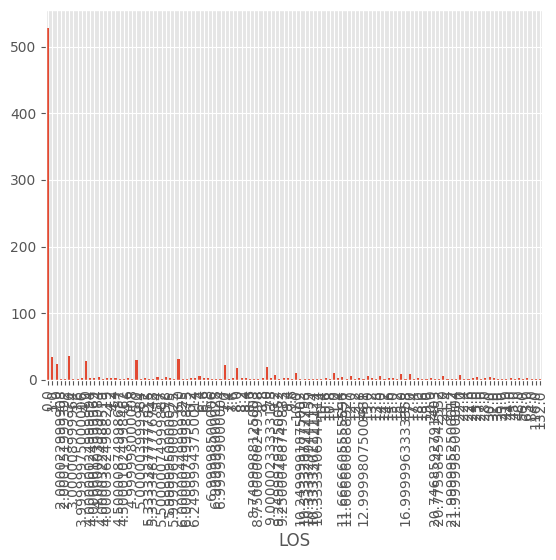

In [9]:
df_los.groupby('LOS').size().plot.bar()
plt.show()

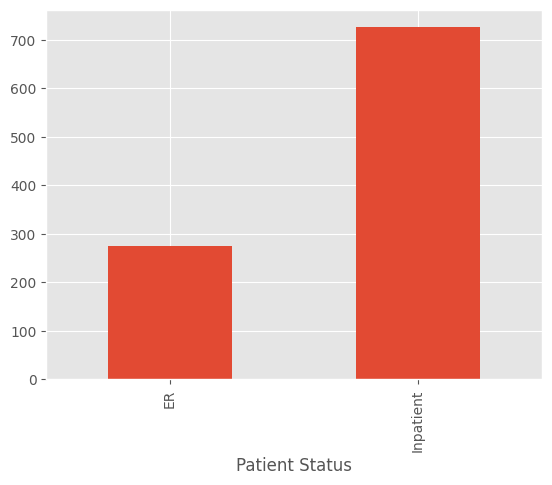

In [10]:
df_los.groupby('Patient Status').size().plot.bar()
plt.show()

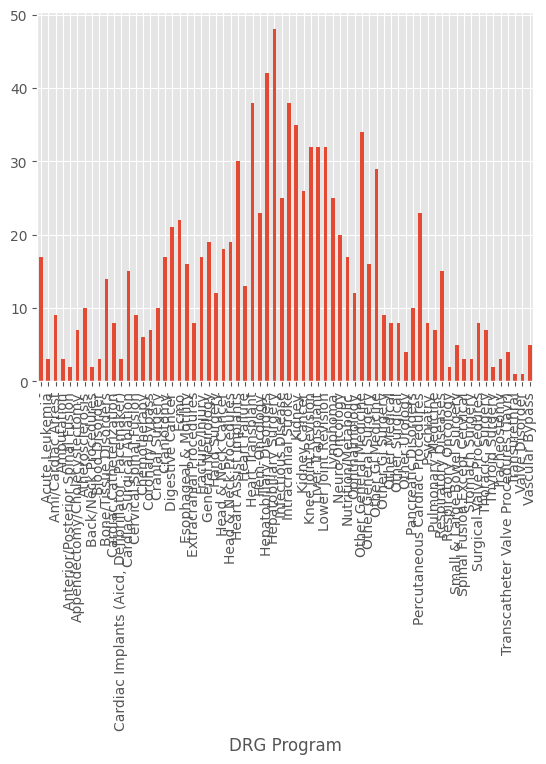

In [11]:
df_los.groupby('DRG Program').size().plot.bar()
plt.show()

#### group the lower portion of categories to one bigger categories, clean the data, lowercase

In [12]:
total = df_los['DRG Program'].count()
value_counts = df_los['DRG Program'].value_counts(normalize=True)
df_counts = pd.DataFrame({'value': value_counts.index, 'count': value_counts.values})
df_counts['portion'] = df_counts['count'].apply(lambda x: x/total)
df_counts = df_counts.sort_values(by='portion', ascending=False)
df_counts

,value,count,portion
0,Hepatobiliary Surgery,0.048,0.000048
1,Hepatobiliary Disorders,0.042,0.000042
2,Heart Transplant,0.038,0.000038
3,Intracranial Stroke,0.038,0.000038
4,Kidney,0.035,0.000035
...,...,...,...
63,Respiratory Oncology,0.002,0.000002
64,Anterior/Posterior Spinal Fusion,0.002,0.000002
65,Thyroid Surgery,0.002,0.000002
66,Transurethral,0.001,0.000001


In [13]:
counts = df_los['DRG Program'].value_counts().sort_values(ascending=False)
threshold = counts.quantile(0.8)
df_los['DRG Program'] = [x if counts[x] >= threshold and x != '-' else 'Other' for x in df_los['DRG Program']]
df_los['DRG Program']


0                       Other
1                       Other
2       Hepatobiliary Surgery
3                       Other
4          Infectious Disease
                ...          
995                     Other
996    Other General Medicine
997                     Other
998     Hepatobiliary Surgery
999             Kidney Cancer
Name: DRG Program, Length: 1000, dtype: object

In [14]:
counts = df_los['DRG Program'].value_counts().sort_values(ascending=False)
counts

Other                      534
Hepatobiliary Surgery       48
Hepatobiliary Disorders     42
Intracranial Stroke         38
Heart Transplant            38
Kidney                      35
Other General Medicine      34
Liver Transplant            32
Lower Joint Revision        32
Knee Joint Revision         32
Heart Assist Implants       30
Other Gi Medicine           29
Kidney Cancer               26
Infectious Disease          25
Lymphoma                    25
Name: DRG Program, dtype: int64

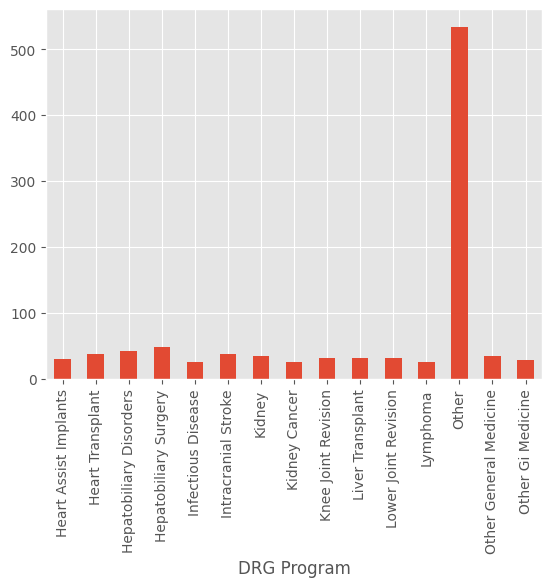

In [15]:
df_los.groupby('DRG Program').size().plot.bar()
plt.show()

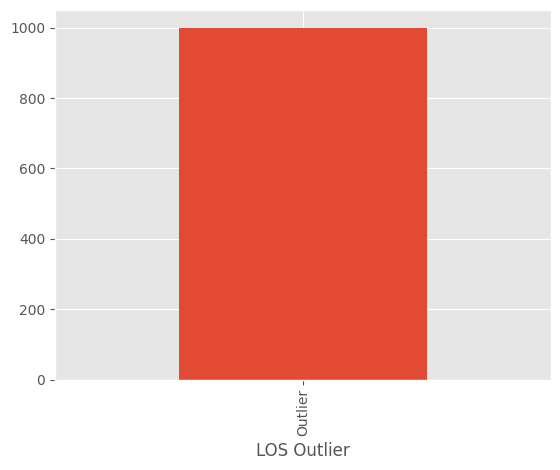

In [16]:
df_los.groupby('LOS Outlier').size().plot.bar()
plt.show()

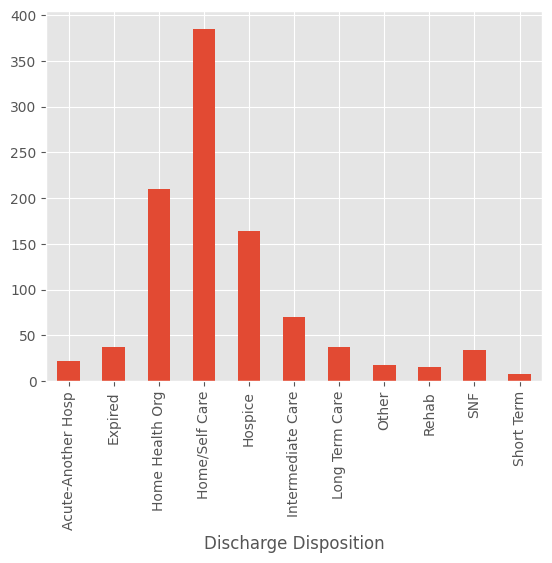

In [17]:
df_los.groupby('Discharge Disposition').size().plot.bar()
plt.show()

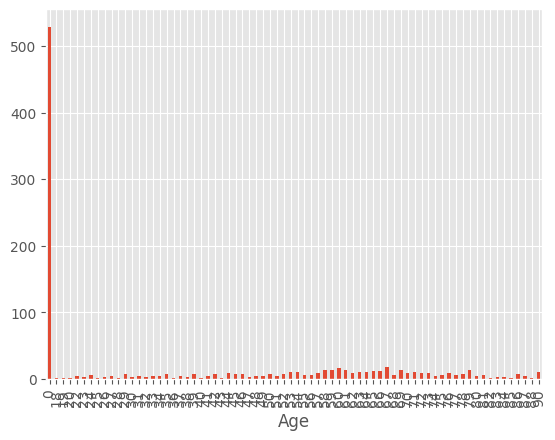

In [18]:
df_los.groupby('Age').size().plot.bar()
plt.show()

#### Patient Status, DRG PROGRAM, LOS Outlier, Discharge Disposition are all categorical features, it's necessary to convert categorical features to numerical. I use one-hot-encoding here

In [19]:
#                     
categorical_columns = [
                    'DRG Program',
                    'Patient Status',                     
                    'Discharge Disposition'
                      ]
for col in categorical_columns:
    #if the original column is present replace it with a one-hot
    if col in X.columns:
        one_hot_encoded = pd.get_dummies(X[col])
        X = X.drop(col, axis=1)
        X = X.join(one_hot_encoded, lsuffix='_left', rsuffix='_right')
        
print(X.shape)

(1000, 90)


In [20]:
#                     
categorical_columns = [
                    'DRG Program',
                    'Patient Status',                     
                    'Discharge Disposition'
                      ]
for col in categorical_columns:
    #if the original column is present replace it with a one-hot
    if col in df_los.columns:
        one_hot_encoded = pd.get_dummies(df_los[col])
        df_los = df_los.drop(col, axis=1)
        df_los = df_los.join(one_hot_encoded, lsuffix='_left', rsuffix='_right')
        
print(df_los.shape)

(1000, 46)


In [21]:
print(df_los.shape)
print(X.shape)
#XnotNorm = np.array(X.copy())
XnotNorm = df_los.copy()
print('XnotNorm ', XnotNorm.shape)

ynotNorm = y.copy()
print('ynotNorm ', ynotNorm.shape)

(1000, 46)
(1000, 90)
XnotNorm  (1000, 46)
ynotNorm  (1000,)


In [22]:
XnotNorm = XnotNorm.drop('Accepting Physician Specialty',1)
XnotNorm = XnotNorm.drop('Required Level Of Care',1)
XnotNorm = XnotNorm.drop('RequestedTreatmentIntervention',1)
XnotNorm = XnotNorm.drop('Gender',1)
XnotNorm = XnotNorm.drop('PAYOR',1)
XnotNorm = XnotNorm.drop('LOA (Mark X if Yes)', 1)
XnotNorm = XnotNorm.drop('FromWherePatientAdmittedtoReferringFacility', 1)
XnotNorm = XnotNorm.drop('EMTALA Y/N(Patient Status Details)', 1)
XnotNorm = XnotNorm.drop('SpecialConsiderations', 1)
XnotNorm = XnotNorm.drop('Transfer Back Agreement', 1)
XnotNorm = XnotNorm.drop('Transfer Referral Source', 1)
XnotNorm = XnotNorm.drop('InfectionPrecaution',1)
XnotNorm = XnotNorm.drop('Request Status',1)
XnotNorm = XnotNorm.drop('LOS',1)
XnotNorm = XnotNorm.drop('ICU LOS',1)
XnotNorm = XnotNorm.drop('LOS Outlier',1)
XnotNorm = XnotNorm.drop('County',1)
# XnotNorm = XnotNorm.drop('DRG PROGRAM',1)
# XnotNorm = XnotNorm.drop('PAYOR',1)
XnotNorm.columns


Index(['Age', 'Heart Assist Implants', 'Heart Transplant',
       'Hepatobiliary Disorders', 'Hepatobiliary Surgery',
       'Infectious Disease', 'Intracranial Stroke', 'Kidney', 'Kidney Cancer',
       'Knee Joint Revision', 'Liver Transplant', 'Lower Joint Revision',
       'Lymphoma', 'Other_left', 'Other General Medicine', 'Other Gi Medicine',
       'ER', 'Inpatient', 'Acute-Another Hosp', 'Expired', 'Home Health Org',
       'Home/Self Care', 'Hospice', 'Intermediate Care', 'Long Term Care',
       'Other_right', 'Rehab', 'SNF', 'Short Term'],
      dtype='object')

In [23]:
ynotNorm

0       0.000000
1       6.200000
2       0.000000
3       0.000000
4       0.000000
         ...    
995     5.000000
996     0.000000
997     6.999999
998    22.000000
999     0.000000
Name: LOS, Length: 1000, dtype: float64

In [24]:
# clean data
XnotNorm.replace('Unknown', pd.np.nan, inplace=True)
XnotNorm.replace('89+', 90, inplace=True)

Normalize X

In [25]:
x = XnotNorm.values #returns a numpy array
scaler = preprocessing.StandardScaler()
x_scaled = scaler.fit_transform(x)
XNorm = pd.DataFrame(x_scaled, columns=XnotNorm.columns)
#print(XNorm)
#print(y)
print('X normalized')

X normalized


In [26]:
XNorm.columns = XNorm.columns.astype(str) 
XNorm

,Age,Heart Assist Implants,Heart Transplant,Hepatobiliary Disorders,Hepatobiliary Surgery,Infectious Disease,Intracranial Stroke,Kidney,Kidney Cancer,Knee Joint Revision,...,Expired,Home Health Org,Home/Self Care,Hospice,Intermediate Care,Long Term Care,Other_right,Rehab,SNF,Short Term
0,-0.875260,-0.175863,-0.198749,-0.209383,-0.224544,-0.160128,-0.198749,-0.190445,-0.163383,-0.181818,...,-0.196014,-0.515580,-0.791212,-0.442913,3.644957,-0.196014,-0.135388,-0.123404,-0.187608,-0.089803
1,1.601891,-0.175863,-0.198749,-0.209383,-0.224544,-0.160128,-0.198749,-0.190445,-0.163383,-0.181818,...,-0.196014,-0.515580,-0.791212,2.257778,-0.274352,-0.196014,-0.135388,-0.123404,-0.187608,-0.089803
2,-0.875260,-0.175863,-0.198749,-0.209383,4.453463,-0.160128,-0.198749,-0.190445,-0.163383,-0.181818,...,-0.196014,1.939563,-0.791212,-0.442913,-0.274352,-0.196014,-0.135388,-0.123404,-0.187608,-0.089803
3,-0.875260,-0.175863,-0.198749,-0.209383,-0.224544,-0.160128,-0.198749,-0.190445,-0.163383,-0.181818,...,-0.196014,1.939563,-0.791212,-0.442913,-0.274352,-0.196014,-0.135388,-0.123404,-0.187608,-0.089803
4,-0.875260,-0.175863,-0.198749,-0.209383,-0.224544,6.244998,-0.198749,-0.190445,-0.163383,-0.181818,...,-0.196014,-0.515580,-0.791212,2.257778,-0.274352,-0.196014,-0.135388,-0.123404,-0.187608,-0.089803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.585624,-0.175863,-0.198749,-0.209383,-0.224544,-0.160128,-0.198749,-0.190445,-0.163383,-0.181818,...,-0.196014,1.939563,-0.791212,-0.442913,-0.274352,-0.196014,-0.135388,-0.123404,-0.187608,-0.089803
996,-0.875260,-0.175863,-0.198749,-0.209383,-0.224544,-0.160128,-0.198749,-0.190445,-0.163383,-0.181818,...,-0.196014,-0.515580,-0.791212,2.257778,-0.274352,-0.196014,-0.135388,-0.123404,-0.187608,-0.089803
997,0.680899,-0.175863,-0.198749,-0.209383,-0.224544,-0.160128,-0.198749,-0.190445,-0.163383,-0.181818,...,-0.196014,-0.515580,-0.791212,-0.442913,-0.274352,5.101669,-0.135388,-0.123404,-0.187608,-0.089803
998,1.855958,-0.175863,-0.198749,-0.209383,4.453463,-0.160128,-0.198749,-0.190445,-0.163383,-0.181818,...,-0.196014,-0.515580,-0.791212,-0.442913,-0.274352,-0.196014,-0.135388,-0.123404,5.330269,-0.089803


In [27]:
# Fill in missing values with imputation of mean
# imputer = SimpleImputer(strategy='mean')
# X = imputer.fit_transform(XNorm.drop(['Age'], axis=1))
# y = XNorm['Age']

In [28]:
# SPLIT into Train & Test

X_train, X_test, y_train, y_test = train_test_split(XNorm, y, test_size=0.2, random_state=7)
print ('X_train: ', X_train.shape)
print ('X_test: ', X_test.shape)
print ('y_train: ', y_train.shape)
print ('y_test: ', y_test.shape)

X_train:  (800, 29)
X_test:  (200, 29)
y_train:  (800,)
y_test:  (200,)


In [31]:

# Test Models and evaluation metric
seed = 42
scoring = 'accuracy' 

# Spot Check Algorithms
Mymodels = []
Mymodels.append(('LinearReg', LinearRegression()))
Mymodels.append(('Ridge', Ridge(alpha=0.5)))
Mymodels.append(('RandomForestRegressor', RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)))
Mymodels.append(('Lasso', Lasso(alpha=0.1)))

# Evaluate each model in turn
results = []
names = []
# ,error_score='raise'
for name, model in Mymodels:
    # Train the model on the training data
    model.fit(X_train, y_train)
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    # Calculate the Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    print("%s mse: %f "% (name, mse))
    
    
    
#     kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
#     cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
#     results.append(cv_results)
#     names.append(name)
#     msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
#     print(msg) 

LinearReg mse: 31.965853 
Ridge mse: 30.968262 
RandomForestRegressor mse: 38.534909 
Lasso mse: 30.378185 


# Linear Regressor

In [40]:
# Optimize hyper params for one model

Linearmodel = LinearRegression()

param_grid = [{},]

Linearmodel = GridSearchCV(Linearmodel, param_grid, cv=5, scoring=scoring)
Linearmodel.fit(XNorm, y)

print(Linearmodel.best_estimator_)

LinearRegression()


In [41]:
Linearmodel = LinearRegression()

In [43]:
Linearmodel.fit(XNorm, y)
final_predictions = Linearmodel.predict(X_test)
# Generate the R-squared
r2 = r2_score(y_test, final_predictions)
print('R-squared:', r2)
mse = mean_squared_error(y_test, final_predictions)

print("Mean Squared Error:", mse)

R-squared: 0.43049725817983364
Mean Squared Error: 28.625566157146654


# Random Forest Regressor

In [44]:
# Optimize hyper params for one model

model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)

param_grid = [{},]

grid_search = GridSearchCV(model, param_grid, cv=5, scoring=scoring)
grid_search.fit(XNorm, y)

print(grid_search.best_estimator_)

RandomForestRegressor(max_depth=5, random_state=42)


In [45]:
model = RandomForestRegressor(max_depth=5, random_state=42)

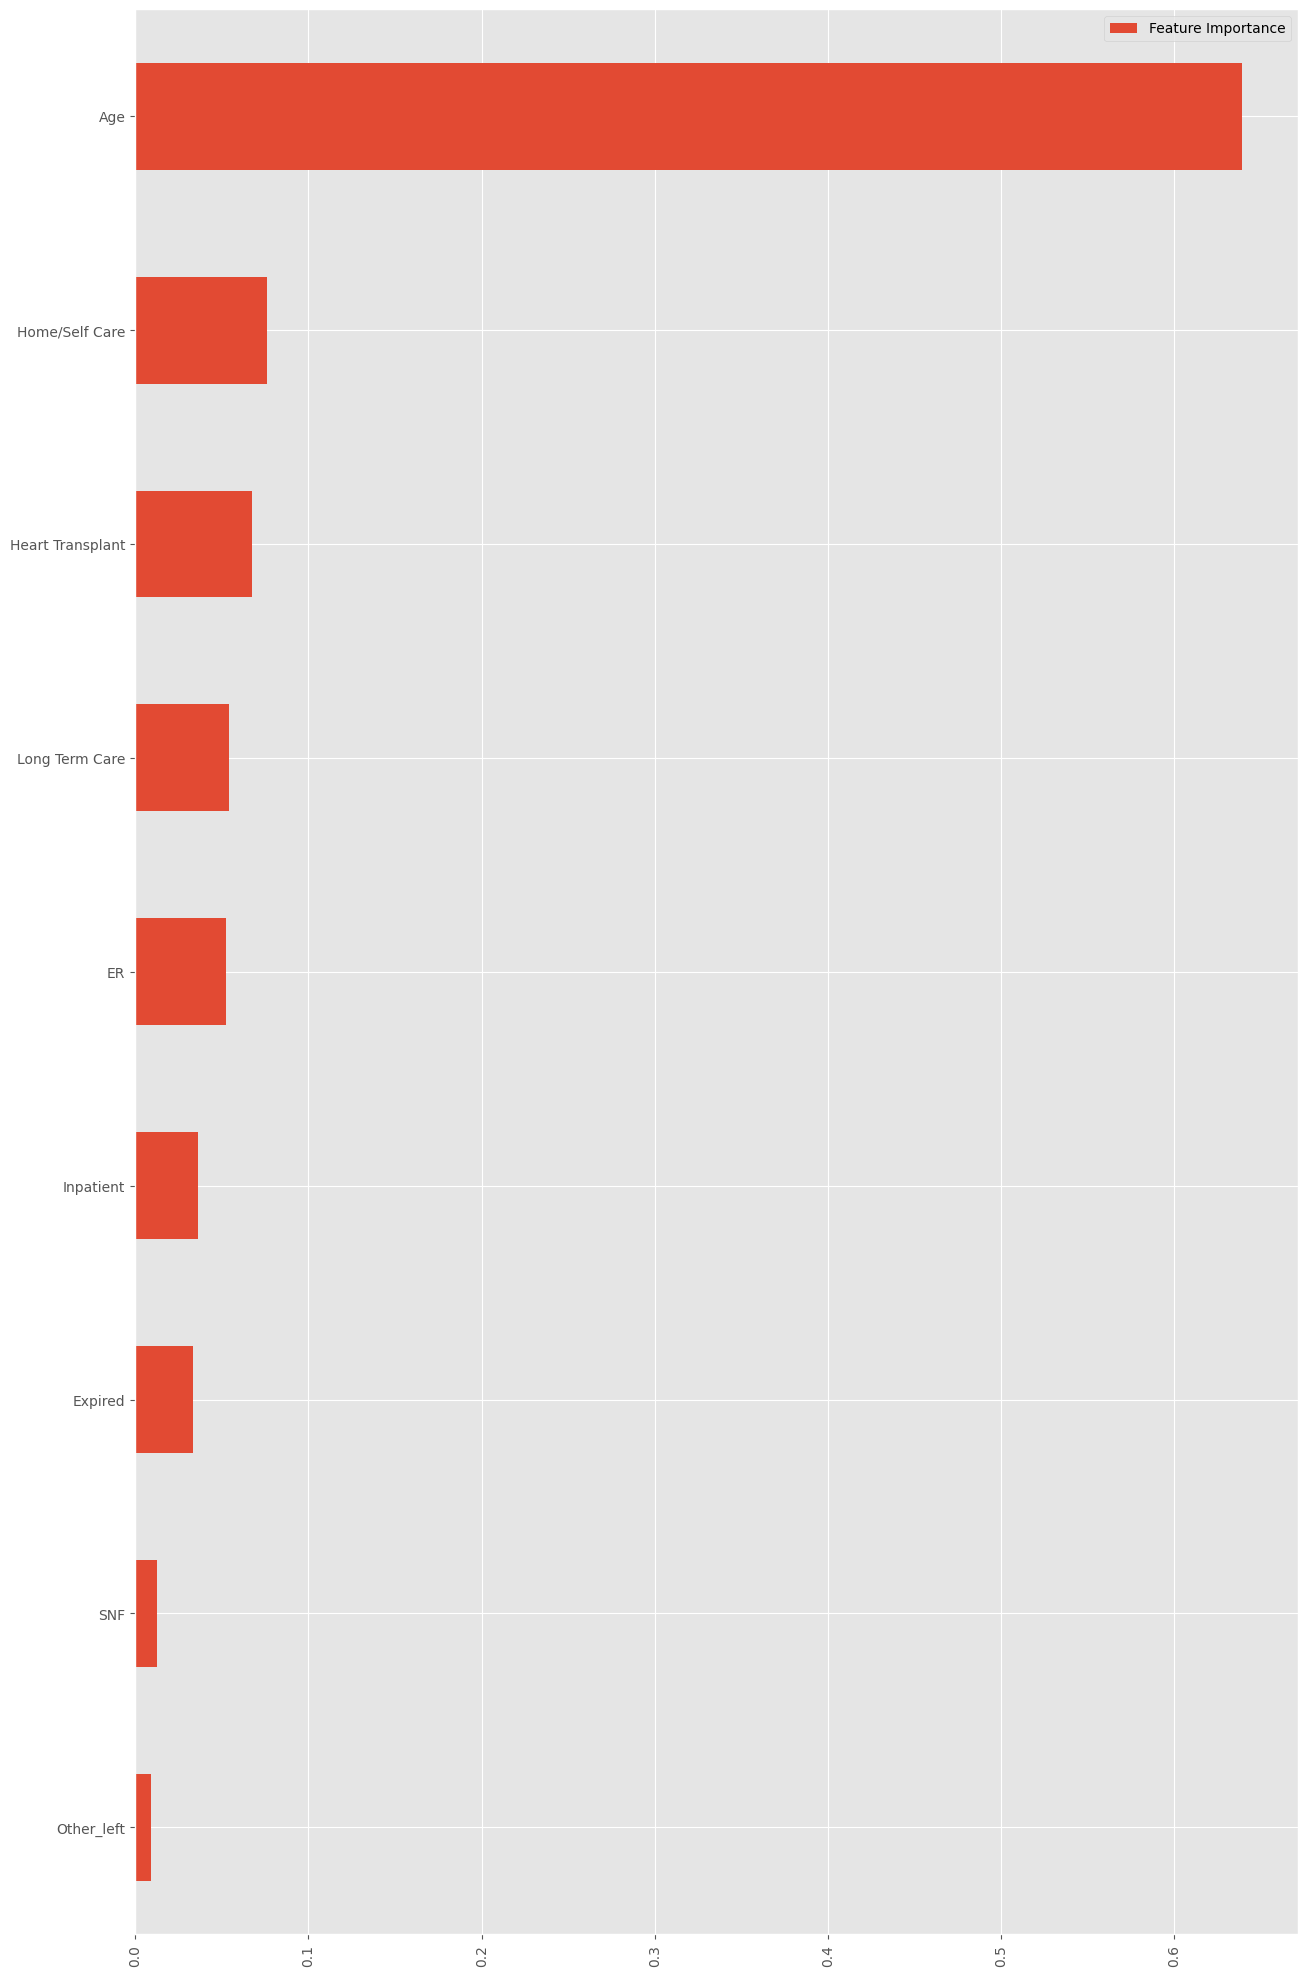

In [46]:
# FEATURE IMPORTANCE - NORMALIZED - last model

trainFinalFI = XNorm
yFinalFI = y

model.fit(trainFinalFI,yFinalFI)

FI_model = pd.DataFrame({"Feature Importance":model.feature_importances_,}, index=trainFinalFI.columns)
FI_model[FI_model["Feature Importance"] > 0.005].sort_values("Feature Importance").plot(kind="barh",figsize=(15,25))
plt.xticks(rotation=90)
plt.xticks(rotation=90)
plt.show()

In [47]:
# List of important features for model
FI_model = pd.DataFrame({"Feature Importance":model.feature_importances_,}, index=trainFinalFI.columns)
FI_model=FI_model.sort_values('Feature Importance', ascending = False)
print(FI_model[FI_model["Feature Importance"] > 0.001])

                         Feature Importance
Age                                0.639213
Home/Self Care                     0.075965
Heart Transplant                   0.067159
Long Term Care                     0.054221
ER                                 0.052402
Inpatient                          0.036456
Expired                            0.033136
SNF                                0.012777
Other_left                         0.009307
Home Health Org                    0.004223
Other General Medicine             0.003439
Liver Transplant                   0.002773
Hepatobiliary Disorders            0.002718
Acute-Another Hosp                 0.002240
Lower Joint Revision               0.001310


In [ ]:
# Model fit and evaluation on test

final_predictions = model.predict(X_test)

: 

In [49]:
# Generate the R-squared
r2 = r2_score(y_test, final_predictions)
print('R-squared:', r2)
mse = mean_squared_error(y_test, final_predictions)
print("Mean Squared Error:", mse)


R-squared: 0.5654686400461357
Mean Squared Error: 21.841345578002603


# Ridge

In [50]:
# Optimize hyper params for one model

Ridgemodel = Ridge(alpha=0.5)

param_grid = [{},]

grid_search = GridSearchCV(Ridgemodel, param_grid, cv=5, scoring=scoring)
grid_search.fit(XNorm, y)

print(grid_search.best_estimator_)

Ridge(alpha=0.5)


In [51]:
# Model fit and evaluation on test
trainFinalFI = XNorm
yFinalFI = y

Ridgemodel.fit(trainFinalFI,yFinalFI)

Ridge_pred = Ridgemodel.predict(X_test)




In [52]:
# Generate the R-squared
r2 = r2_score(y_test, Ridge_pred)
# cm = confusion_matrix(y_test, final_predictions)
print('R-squared:', r2)
mse = mean_squared_error(y_test, Ridge_pred)

print("Mean Squared Error:", mse)

R-squared: 0.43829841600887776
Mean Squared Error: 28.23344765948337


# Lasso

In [53]:
# Optimize hyper params for one model

Lassomodel = Lasso(alpha=0.1)

param_grid = [{},]

grid_search = GridSearchCV(Lassomodel, param_grid, cv=5, scoring=scoring)
grid_search.fit(XNorm, y)

print(grid_search.best_estimator_)

Lasso(alpha=0.1)


In [54]:
# Model fit and evaluation on test
trainFinalFI = XNorm
yFinalFI = y

Lassomodel.fit(trainFinalFI,yFinalFI)

Lasso_pred = Lassomodel.predict(X_test)


In [55]:
# Generate the R-squared
r2 = r2_score(y_test, Lasso_pred)
print('R-squared:', r2)
mse = mean_squared_error(y_test, Lasso_pred)

print("Mean Squared Error:", mse)

R-squared: 0.4430133085089806
Mean Squared Error: 27.99645763770724
